# Lorenz system

https://en.wikipedia.org/wiki/Lorenz_system

$$ \begin{eqnarray}
\frac{dx}{dt} & = & \sigma (y-z) \\
\frac{dy}{dt} & = & x (\rho-z)-y \\
\frac{dz}{dt} & = & xy - \beta z \\
\end{eqnarray}
$$

Typical values: $\sigma$ = 10, $\beta$  = 8/3, $\rho$ = 28

In [158]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [159]:
def lorenz_dt(X, t, sigma, beta, rho):
    x, y, z = X    
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z  
    return dx, dy, dz

In [160]:
sigma = 10.0
beta  = 8.0 / 3.0
rho   = 28.0

In [161]:
X0 = (10, 10, 30)

In [162]:
t = np.arange(0.0, 50.0, 0.01)
 
X = odeint(lorenz_dt, X0, t, args=(sigma,beta,rho))

x = X[:, 0]; y = X[:, 1]; z = X[:, 2]

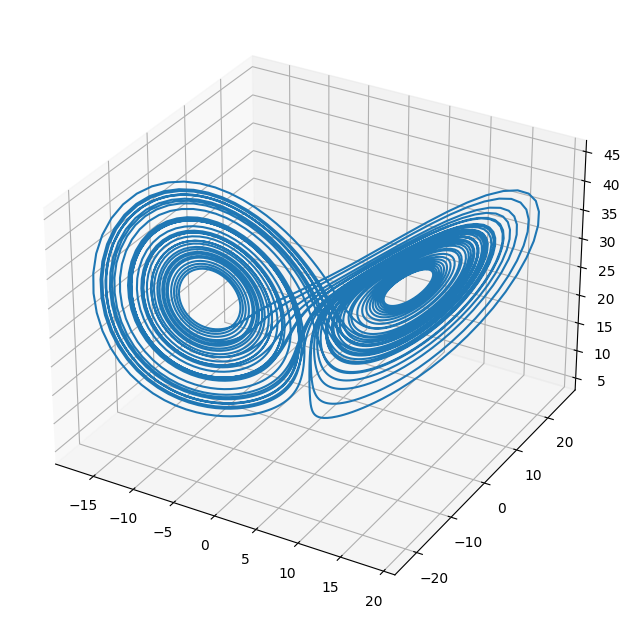

In [163]:
fig = plt.figure(figsize=(8,8),dpi=100)
ax = fig.gca(projection="3d")
ax.plot(x,y,z)

Text(0.5, 0, 'z')

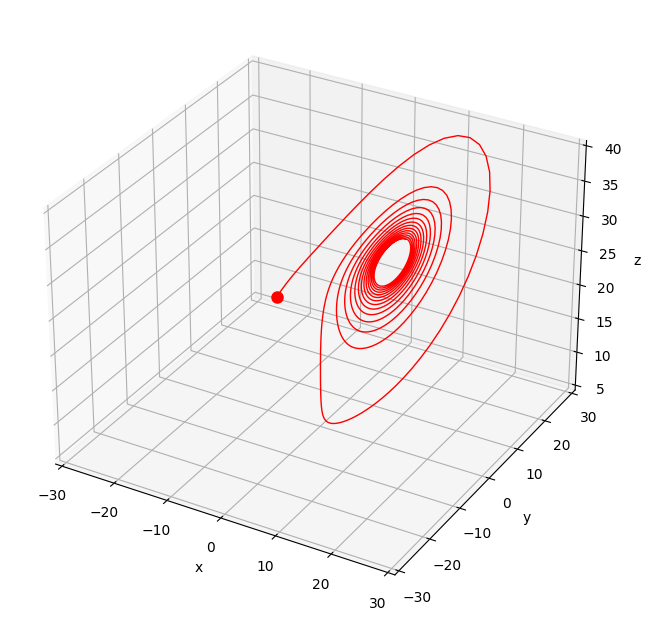

In [164]:
i = 1000

fig = plt.figure(figsize=(8,8),dpi=100)
ax = fig.gca(projection="3d")

ax.plot(x[:i],y[:i],z[:i],"-",linewidth=1,color="red")
ax.plot(x[i],y[i],z[i],"o",markersize=8,color="red")

ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
ax.set_zlim([5,40])


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 'z')

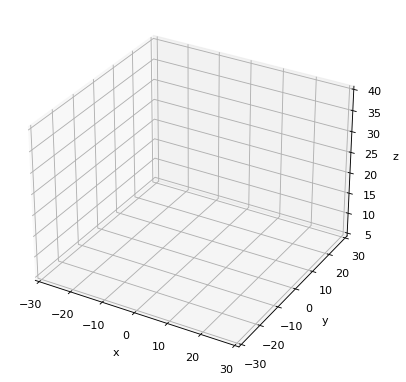

In [165]:
fig = plt.figure(figsize=(6,6),dpi=80)
ax = fig.gca(projection="3d")
line, = ax.plot([],[],[],"-",linewidth=1,color="red")
ball, = ax.plot([],[],[],"o",markersize=8,color="red")
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
ax.set_zlim([5,40])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [166]:
from matplotlib.animation import FuncAnimation, FFMpegWriter
%matplotlib inline
from IPython.display import HTML, Image

def lorenz_animate(i):
    line.set_data(x[:i],y[:i])
    line.set_3d_properties(z[:i])
    ball.set_data(x[i],y[i])
    ball.set_3d_properties(z[i])
    return (line,)

anim = FuncAnimation(fig,lorenz_animate,frames=range(0,len(t),20),blit=True)

In [167]:
HTML(anim.to_html5_video())

In [168]:
anim.save('movies/lorenz.mp4', writer=FFMpegWriter(fps=20))

In [169]:
anim.save('gifs/lorenz.gif', writer='imagemagick', fps=20)

In [170]:
Image(url='gifs/lorenz.gif')